<a href="https://colab.research.google.com/github/lapatradaa/BSC_DPDM23/blob/main/midterm_bscdpdm23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

เตรียมข้อมูลอุตุนิยมวิทยา (https://drive.google.com/drive/folders/1k6tJcTTv2bKmFz6A5oOWi-sAeTVIQpG4?usp=sharing)

ให้เตรียมข้อมูลลักษณะอากาศของแต่ละวัน (แก้ missing, noise, ฯลฯ ) และสร้างตารางเพื่อทำการทำนาย ปริมาณน้ำฝนสำหรับจังหวัดขอนแก่นของวันถัดไป (ปริมาณน้ำฝนขอนแก่นของวันที่ D+1) จากข้อมูลลักษณะอากาศในจังหวัดต่างๆ (ขอนแก่น,หนองคาย,นครพนม,เลย,สกลนคร) ของวันปัจจุบัน (อุณหภูมิตุ้มแห้งขอนแก่นของวันที่ D,...,ความเร็วลมสกลนครของวันที่ D)


ตัวอย่างตารางที่ต้องการ (Xi มีทั้งหมด 5จังหวัด * 8ลักษณะอากาศ = 40 columns และ Y อีก 1 columns)

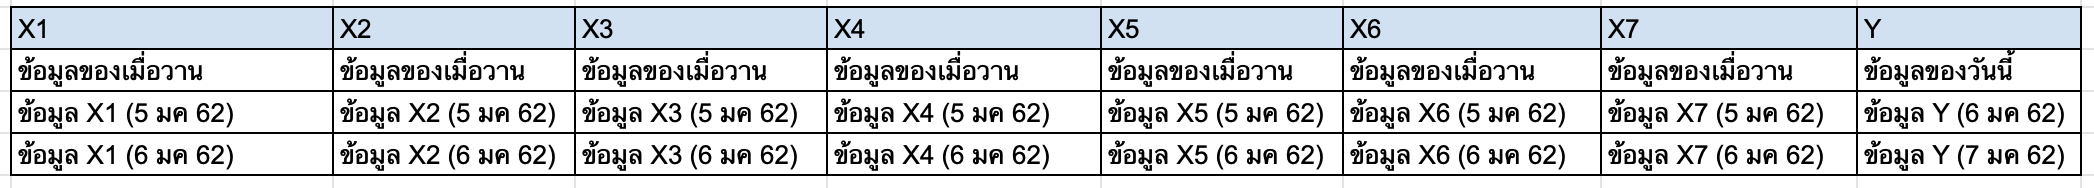

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import os

In [3]:
#ความกด(เปอร์เซ็นต์)(atm)
atm_kkn = pd.read_excel('/content/drive/MyDrive/bsc_dpdm23/อุตุ/ความกด(เปอร์เซ็นต์)/จ.ขอนแก่น.xlsx', header = 4)
atm_npm = pd.read_excel('/content/drive/MyDrive/bsc_dpdm23/อุตุ/ความกด(เปอร์เซ็นต์)/จ.นครพนม.xlsx', header = 4)
atm_snk = pd.read_excel('/content/drive/MyDrive/bsc_dpdm23/อุตุ/ความกด(เปอร์เซ็นต์)/จ.สกลนคร.xlsx', header = 4)
atm_nki = pd.read_excel('/content/drive/MyDrive/bsc_dpdm23/อุตุ/ความกด(เปอร์เซ็นต์)/จ.หนองคาย.xlsx', header = 4)
atm_lei = pd.read_excel('/content/drive/MyDrive/bsc_dpdm23/อุตุ/ความกด(เปอร์เซ็นต์)/จ.เลย.xlsx', header = 4)

#ความชื้นสัมพัทธ์(เปอร์เซ็นต์) relative humidity
rh_kkn = pd.read_excel('/content/drive/MyDrive/bsc_dpdm23/อุตุ/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.ขอนแก่น.xlsx', header = 4)
rh_npm = pd.read_excel('/content/drive/MyDrive/bsc_dpdm23/อุตุ/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.นครพนม.xlsx', header = 4)
rh_snk = pd.read_excel('/content/drive/MyDrive/bsc_dpdm23/อุตุ/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.สกลนคร.xlsx', header = 4)
rh_nki = pd.read_excel('/content/drive/MyDrive/bsc_dpdm23/อุตุ/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.หนองคาย.xlsx', header = 4)
rh_lei = pd.read_excel('/content/drive/MyDrive/bsc_dpdm23/อุตุ/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.เลย.xlsx', header = 4)

#ความเร็วลม(นอต)
wind_kkn = pd.read_excel('/content/drive/MyDrive/bsc_dpdm23/อุตุ/ความเร็วลม(นอต)/จ.ขอนแก่น.xlsx', header = 4)
wind_npm = pd.read_excel('/content/drive/MyDrive/bsc_dpdm23/อุตุ/ความเร็วลม(นอต)/จ.นครพนม.xlsx', header = 4)
wind_snk = pd.read_excel('/content/drive/MyDrive/bsc_dpdm23/อุตุ/ความเร็วลม(นอต)/จ.สกลนคร.xlsx', header = 4)
wind_nki = pd.read_excel('/content/drive/MyDrive/bsc_dpdm23/อุตุ/ความเร็วลม(นอต)/จ.หนองคาย.xlsx', header = 4)
wind_lei = pd.read_excel('/content/drive/MyDrive/bsc_dpdm23/อุตุ/ความเร็วลม(นอต)/จ.เลย.xlsx', header = 4)

#จำนวนเมฆ(10ส่วน)
cloud_kkn = pd.read_excel('/content/drive/MyDrive/bsc_dpdm23/อุตุ/จำนวนเมฆ(10ส่วน)/จ.ขอนแก่น.xlsx', header = 4)
cloud_npm = pd.read_excel('/content/drive/MyDrive/bsc_dpdm23/อุตุ/จำนวนเมฆ(10ส่วน)/จ.นครพนม.xlsx', header = 4)
cloud_snk = pd.read_excel('/content/drive/MyDrive/bsc_dpdm23/อุตุ/จำนวนเมฆ(10ส่วน)/จ.สกลนคร.xlsx', header = 4)
cloud_nki = pd.read_excel('/content/drive/MyDrive/bsc_dpdm23/อุตุ/จำนวนเมฆ(10ส่วน)/จ.หนองคาย.xlsx', header = 4)
cloud_lei = pd.read_excel('/content/drive/MyDrive/bsc_dpdm23/อุตุ/จำนวนเมฆ(10ส่วน)/จ.เลย.xlsx', header = 4)

#ปริมาณฝน(มิลลิเมตร)
rain_kkn = pd.read_excel('/content/drive/MyDrive/bsc_dpdm23/อุตุ/ปริมาณฝน(มิลลิเมตร)/จ.ขอนแก่น.xlsx', header = 4)
rain_npm = pd.read_excel('/content/drive/MyDrive/bsc_dpdm23/อุตุ/ปริมาณฝน(มิลลิเมตร)/จ.นครพนม.xlsx', header = 4)
rain_snk = pd.read_excel('/content/drive/MyDrive/bsc_dpdm23/อุตุ/ปริมาณฝน(มิลลิเมตร)/จ.สกล.xlsx', header = 4)
rain_nki = pd.read_excel('/content/drive/MyDrive/bsc_dpdm23/อุตุ/ปริมาณฝน(มิลลิเมตร)/จ.หนองคาย.xlsx', header = 4)
rain_lei = pd.read_excel('/content/drive/MyDrive/bsc_dpdm23/อุตุ/ปริมาณฝน(มิลลิเมตร)/จ.เลย.xlsx', header = 4)

#อุณหภูมิจุดน้ำค้าง(เซลเซียส) dew point temperature
dp_kkn = pd.read_excel('/content/drive/MyDrive/bsc_dpdm23/อุตุ/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.ขอนแก่น.xlsx', header = 4)
dp_npm = pd.read_excel('/content/drive/MyDrive/bsc_dpdm23/อุตุ/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.นครพนม.xlsx', header = 4)
dp_snk = pd.read_excel('/content/drive/MyDrive/bsc_dpdm23/อุตุ/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.สกล.xlsx', header = 4)
dp_nki = pd.read_excel('/content/drive/MyDrive/bsc_dpdm23/อุตุ/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.หนองคาย.xlsx', header = 4)
dp_lei = pd.read_excel('/content/drive/MyDrive/bsc_dpdm23/อุตุ/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.เลย.xlsx', header = 4)

#อุณหภูมิตุ้มแห้ง(เซลเซียส) dry
dry_kkn = pd.read_excel('/content/drive/MyDrive/bsc_dpdm23/อุตุ/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.ขอนแก่น.xlsx', header = 4)
dry_npm = pd.read_excel('/content/drive/MyDrive/bsc_dpdm23/อุตุ/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.นครพนม.xlsx', header = 4)
dry_snk = pd.read_excel('/content/drive/MyDrive/bsc_dpdm23/อุตุ/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.สกล.xlsx', header = 4)
dry_nki = pd.read_excel('/content/drive/MyDrive/bsc_dpdm23/อุตุ/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.หนองคาย.xlsx', header = 4)
dry_lei = pd.read_excel('/content/drive/MyDrive/bsc_dpdm23/อุตุ/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.เลย.xlsx', header = 4)

#อุณหภูมิต่ำสุด(เซลเซียส)
low_kkn = pd.read_excel('/content/drive/MyDrive/bsc_dpdm23/อุตุ/อุณหภูมิต่ำสุด(เซลเซียส)/จ.ขอนแก่น.xlsx', header = 4)
low_npm = pd.read_excel('/content/drive/MyDrive/bsc_dpdm23/อุตุ/อุณหภูมิต่ำสุด(เซลเซียส)/จ.นครพนม.xlsx', header = 4)
low_snk = pd.read_excel('/content/drive/MyDrive/bsc_dpdm23/อุตุ/อุณหภูมิต่ำสุด(เซลเซียส)/จ.สกล.xlsx', header = 4)
low_nki = pd.read_excel('/content/drive/MyDrive/bsc_dpdm23/อุตุ/อุณหภูมิต่ำสุด(เซลเซียส)/จ.หนองคาย.xlsx', header = 4)
low_lei = pd.read_excel('/content/drive/MyDrive/bsc_dpdm23/อุตุ/อุณหภูมิต่ำสุด(เซลเซียส)/จ.เลย.xlsx', header = 4)

#### clean data and missing

#### atm

In [4]:
import pandas as pd
import numpy as np

# Define your rename_and_reshape function
def rename_and_reshape(df):
    # Rename columns
    df = df.rename(columns={'Unnamed: 0': 'ที่', 'Unnamed: 1': 'สถานี', 'Unnamed: 2': 'เดือน/ปี', 'Unnamed: 34': 'เฉลี่ย'})

    # Melt
    reshaped_df = df.melt(id_vars=['ที่', 'สถานี', 'เดือน/ปี', 'เฉลี่ย'], var_name='day', value_name='atm')

    # Convert 'day' column to string and then filter out rows where 'day' is not purely numeric
    reshaped_df['day'] = reshaped_df['day'].astype(str)
    reshaped_df = reshaped_df[reshaped_df['day'].str.contains('^\d+$', regex=True)]

    return reshaped_df

# Assuming atm_kkn, atm_npm, atm_snk, atm_nki, atm_lei are predefined dataframes
dataframes = [atm_kkn, atm_npm, atm_snk, atm_nki, atm_lei]
reshaped_dfs = [rename_and_reshape(df) for df in dataframes]
final_atm = pd.concat(reshaped_dfs, ignore_index=True)

# Data type conversion
final_atm['day'] = final_atm['day'].astype(int)
final_atm['atm'] = pd.to_numeric(final_atm['atm'], errors='coerce')

# Calculate the mean of the 'atm' column excluding NaN values
mean_atm = final_atm['atm'].mean()

# Fill missing values in 'atm' column with the mean
final_atm['atm'].fillna(mean_atm, inplace=True)

# Optional: Check if there are any null values left in 'atm' column
atm_isnull_any = final_atm['atm'].isnull().any()

# Print the result of the null check
print(f"null values is true oe false: {atm_isnull_any}")


null values is true oe false: False


In [5]:
final_atm

,ที่,สถานี,เดือน/ปี,เฉลี่ย,day,atm
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,1010.350645,1,1005.470000
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,1011.717000,1,1011.790000
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,1016.470000,1,1011.430000
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,1012.484516,1,1015.670000
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,1009.749667,1,1013.260000
...,...,...,...,...,...,...
8520,48,352201-หนองคาย จ.หนองคาย,2021-10-01,1009.544839,31,1013.090000
8521,49,352201-หนองคาย จ.หนองคาย,2021-11-01,1012.342333,31,1013.019193
8522,50,352201-หนองคาย จ.หนองคาย,2021-12-01,1016.042903,31,1018.320000
8523,1,352201-หนองคาย จ.หนองคาย,2022-01-01,1013.065806,31,1009.160000


#### rh

In [9]:
import pandas as pd
import numpy as np

def rename_and_reshape(df):
    df = df.rename(columns={'Unnamed: 0': 'ที่', 'Unnamed: 1': 'สถานี', 'Unnamed: 2': 'เดือน/ปี', 'Unnamed: 34': 'เฉลี่ย'})

    reshaped_df = df.melt(id_vars=['ที่', 'สถานี', 'เดือน/ปี', 'เฉลี่ย'], var_name='day', value_name='rh')

    reshaped_df['day'] = reshaped_df['day'].astype(str)
    reshaped_df = reshaped_df[reshaped_df['day'].str.contains('^\d+$', regex=True)]

    return reshaped_df

dataframes = [rh_kkn, rh_npm, rh_snk, rh_nki, rh_lei]
reshaped_dfs = [rename_and_reshape(df) for df in dataframes]
final_rh = pd.concat(reshaped_dfs, ignore_index=True)

final_rh['day'] = final_rh['day'].astype(int)
final_rh['rh'] = pd.to_numeric(final_rh['rh'], errors='coerce')

mean_rh = final_rh['rh'].mean()

final_rh['rh'].fillna(mean_rh, inplace=True)

rh_isnull_any = final_rh['rh'].isnull().any()

print(f"null values is true or false: {atm_isnull_any}")


null values is true or false: False


###wind

In [12]:
import pandas as pd
import numpy as np

def rename_and_reshape(df):
    df = df.rename(columns={'Unnamed: 0': 'ที่', 'Unnamed: 1': 'สถานี', 'Unnamed: 2': 'เดือน/ปี', 'Unnamed: 34': 'เฉลี่ย'})

    reshaped_df = df.melt(id_vars=['ที่', 'สถานี', 'เดือน/ปี', 'เฉลี่ย'], var_name='day', value_name='wind')

    reshaped_df['day'] = reshaped_df['day'].astype(str)
    reshaped_df = reshaped_df[reshaped_df['day'].str.contains('^\d+$', regex=True)]

    return reshaped_df

dataframes = [wind_kkn, wind_npm, wind_snk, wind_nki, wind_lei]
reshaped_dfs = [rename_and_reshape(df) for df in dataframes]
final_wind = pd.concat(reshaped_dfs, ignore_index=True)

final_wind['day'] = final_wind['day'].astype(int)
final_wind['wind'] = pd.to_numeric(final_wind['wind'], errors='coerce')

mean_wind = final_wind['wind'].mean()

final_wind['wind'].fillna(mean_wind, inplace=True)

wind_isnull_any = final_wind['wind'].isnull().any()

print(f"null values is true or false: {atm_isnull_any}")


null values is true or false: False


###rain

In [15]:
import pandas as pd
import numpy as np

def rename_and_reshape(df):
    df = df.rename(columns={'Unnamed: 0': 'ที่', 'Unnamed: 1': 'สถานี', 'Unnamed: 2': 'เดือน/ปี', 'Unnamed: 34': 'เฉลี่ย'})

    reshaped_df = df.melt(id_vars=['ที่', 'สถานี', 'เดือน/ปี', 'เฉลี่ย'], var_name='day', value_name='rain')

    reshaped_df['day'] = reshaped_df['day'].astype(str)
    reshaped_df = reshaped_df[reshaped_df['day'].str.contains('^\d+$', regex=True)]

    return reshaped_df

dataframes = [rain_kkn, rain_npm, rain_snk, rain_nki, rain_lei]
reshaped_dfs = [rename_and_reshape(df) for df in dataframes]
final_rain = pd.concat(reshaped_dfs, ignore_index=True)

final_rain['day'] = final_rain['day'].astype(int)
final_rain['rain'] = pd.to_numeric(final_rain['rain'], errors='coerce')

mean_rain = final_rain['rain'].mean()

final_rain['rain'].fillna(mean_rain, inplace=True)

rain_isnull_any = final_rain['rain'].isnull().any()

print(f"null values is true or false: {atm_isnull_any}")

null values is true or false: False


###dp

In [16]:
import pandas as pd
import numpy as np

def rename_and_reshape(df):
    df = df.rename(columns={'Unnamed: 0': 'ที่', 'Unnamed: 1': 'สถานี', 'Unnamed: 2': 'เดือน/ปี', 'Unnamed: 34': 'เฉลี่ย'})

    reshaped_df = df.melt(id_vars=['ที่', 'สถานี', 'เดือน/ปี', 'เฉลี่ย'], var_name='day', value_name='dp')

    reshaped_df['day'] = reshaped_df['day'].astype(str)
    reshaped_df = reshaped_df[reshaped_df['day'].str.contains('^\d+$', regex=True)]

    return reshaped_df

dataframes = [dp_kkn, dp_npm, dp_snk, dp_nki, dp_lei]
reshaped_dfs = [rename_and_reshape(df) for df in dataframes]
final_dp = pd.concat(reshaped_dfs, ignore_index=True)

final_dp['day'] = final_dp['day'].astype(int)
final_dp['dp'] = pd.to_numeric(final_dp['dp'], errors='coerce')

mean_dp = final_dp['dp'].mean()

final_dp['dp'].fillna(mean_dp, inplace=True)

dp_isnull_any = final_dp['dp'].isnull().any()

print(f"null values is true or false: {atm_isnull_any}")

null values is true or false: False


In [ ]:
###dry

In [18]:
import pandas as pd
import numpy as np

def rename_and_reshape(df):
    df = df.rename(columns={'Unnamed: 0': 'ที่', 'Unnamed: 1': 'สถานี', 'Unnamed: 2': 'เดือน/ปี', 'Unnamed: 34': 'เฉลี่ย'})

    reshaped_df = df.melt(id_vars=['ที่', 'สถานี', 'เดือน/ปี', 'เฉลี่ย'], var_name='day', value_name='dry')

    reshaped_df['day'] = reshaped_df['day'].astype(str)
    reshaped_df = reshaped_df[reshaped_df['day'].str.contains('^\d+$', regex=True)]

    return reshaped_df

dataframes = [dry_kkn, dry_npm, dry_snk, dry_nki, dry_lei]
reshaped_dfs = [rename_and_reshape(df) for df in dataframes]
final_dry = pd.concat(reshaped_dfs, ignore_index=True)

final_dry['day'] = final_dry['day'].astype(int)
final_dry['dry'] = pd.to_numeric(final_dry['dry'], errors='coerce')

mean_dry = final_dry['dry'].mean()

final_dry['dry'].fillna(mean_dry, inplace=True)

dry_isnull_any = final_dry['dry'].isnull().any()

print(f"null values is true or false: {atm_isnull_any}")

null values is true or false: False


In [19]:
import pandas as pd
import numpy as np

def rename_and_reshape(df):
    df = df.rename(columns={'Unnamed: 0': 'ที่', 'Unnamed: 1': 'สถานี', 'Unnamed: 2': 'เดือน/ปี', 'Unnamed: 34': 'เฉลี่ย'})

    reshaped_df = df.melt(id_vars=['ที่', 'สถานี', 'เดือน/ปี', 'เฉลี่ย'], var_name='day', value_name='low')

    reshaped_df['day'] = reshaped_df['day'].astype(str)
    reshaped_df = reshaped_df[reshaped_df['day'].str.contains('^\d+$', regex=True)]

    return reshaped_df

dataframes = [low_kkn, low_npm, low_snk, low_nki, low_lei]
reshaped_dfs = [rename_and_reshape(df) for df in dataframes]
final_low = pd.concat(reshaped_dfs, ignore_index=True)

final_low['day'] = final_low['day'].astype(int)
final_low['low'] = pd.to_numeric(final_low['low'], errors='coerce')

mean_low = final_low['low'].mean()

final_low['low'].fillna(mean_low, inplace=True)

low_isnull_any = final_low['low'].isnull().any()

print(f"null values is true or false: {atm_isnull_any}")

null values is true or false: False
